# Visualize Results of Matching Runs from IND Runs with extra variable types
including the combined predicates of 1 and 4

## Import in data from runs

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('ind_runs_ext.csv')

In [3]:
data_df['settings_file'].unique()

array(['dedupe_extension/settings/settings_IND_ext_5',
       'dedupe_extension/settings/settings_IND_ext_4',
       'dedupe_extension/settings/settings_IND_ext_3',
       'dedupe_extension/settings/settings_IND_ext_2',
       'dedupe_extension/settings/settings_IND_ext_1',
       'dedupe_extension/settings/settings_IND_ext_0',
       'dedupe_extension/settings_IND_0',
       'dedupe_extension/settings_IND_1',
       'dedupe_extension/settings_IND_2',
       'dedupe_extension/settings_IND_3',
       'dedupe_extension/settings_IND_4'], dtype=object)

In [4]:
data_df.shape

(55, 12)

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import linspace

In [6]:
files = [['dedupe_extension/settings_IND_0','settings_IND_0 orig',2],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig',0],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig',0],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig',0],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig', 0],
         ['dedupe_extension/settings/settings_IND_ext_4','settings_IND_4 extra',1],
         ['dedupe_extension/settings/settings_IND_ext_3','settings_IND_3 extra',2],
         ['dedupe_extension/settings/settings_IND_ext_2','settings_IND_2 extra',1],
         ['dedupe_extension/settings/settings_IND_ext_1','settings_IND_1 extra',1],
         ['dedupe_extension/settings/settings_IND_ext_0','settings_IND_0 extra',1]]

In [7]:
start = 0.3
stop = 1.0
number_of_lines= 7
cm_subsection = linspace(start, stop, number_of_lines)
cm_subsection_1 = linspace(.5,stop, 3)
purples = [ cm.Purples(x) for x in cm_subsection ]
reds = [ cm.Reds(x) for x in cm_subsection ]
blues = [ cm.Blues(x) for x in cm_subsection_1 ]
colors = [purples,reds,blues]

In [8]:
ratio_sets = []
color_iter = 0
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    # todo: make lookup in color_iter
    j = i
    if i > 4:
        j = i-5
    color = colors[file[2]][j]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color])

In [9]:
ratio_sets

[[array([123946, 226790, 317552, 402157, 480824]),
  array([15.80943878, 11.33043565,  9.84748969,  9.14554386,  8.59135904]),
  'settings_IND_0 orig',
  (0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([15.27933925, 11.18293886,  9.86645953,  9.07537292,  8.60319562]),
  'settings_IND_1 orig',
  (0.698961937716263, 0.6965013456362938, 0.8372164552095348, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([16.35171504, 11.64518614, 10.11215489,  9.35858233,  8.79470296]),
  'settings_IND_2 orig',
  (0.5882352941176471, 0.57359477124183, 0.7696732026143791, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([18.05740093, 12.61065391, 10.8810307 , 10.00813777,  9.41536774]),
  'settings_IND_3 orig',
  (0.48402921953094963, 0.4543329488658208, 0.7106651287966167, 1.0)],
 [array([123946, 226790, 317552, 402157, 480824]),
  array([14.79775549, 10.67900363,  9.30937234,  8.60357701,  

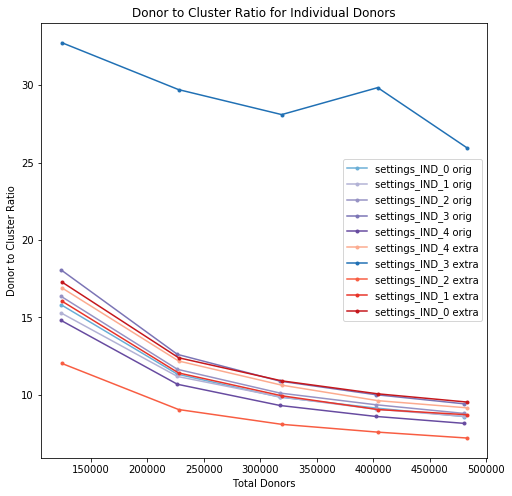

In [12]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('Total Donors')
plt.ylabel('Donor to Cluster Ratio')
plt.title('Donor to Cluster Ratio for Individual Donors')
plt.legend()

In [11]:
avg_size_sets = []
for i, file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    j = i
    if i > 4:
        j = i-5
    color = colors[file[2]][j]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color])

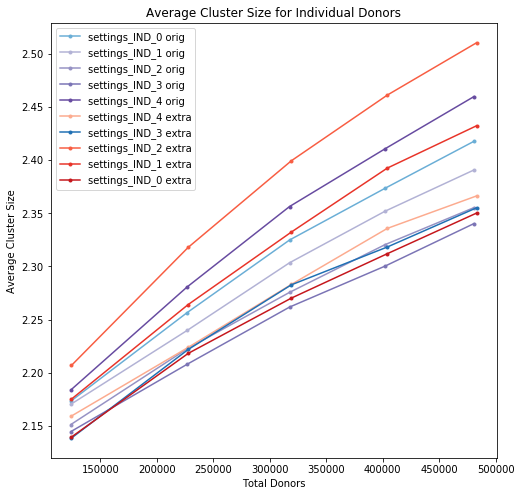

In [13]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('Total Donors')
plt.ylabel('Average Cluster Size')
plt.title('Average Cluster Size for Individual Donors')
plt.legend()

In [14]:
biggest_size_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    j = i
    if i > 4:
        j = i-5
    color = colors[file[2]][j]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], color])

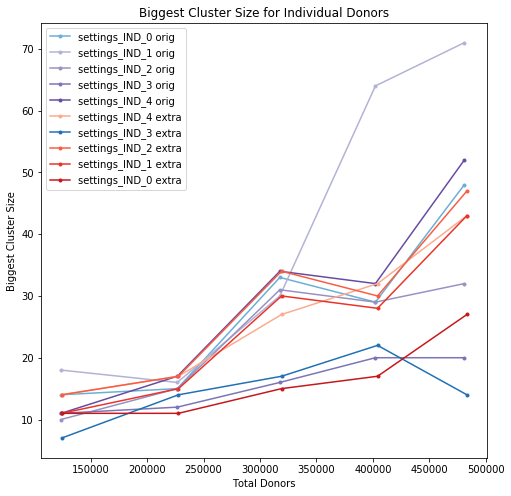

In [15]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('Total Donors')
plt.ylabel('Biggest Cluster Size')
plt.title('Biggest Cluster Size for Individual Donors')
plt.legend()

In [19]:
total_clusters_sets = []
for i,file in enumerate(files):
    data_cut = data_df[data_df['settings_file'] == file[0]].sort_values('total_donors')
    j = i
    if i > 4:
        j = i-5
    color = colors[file[2]][j]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[1], color])

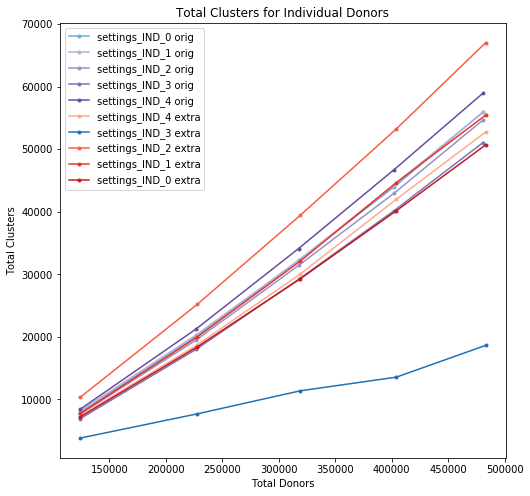

In [20]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('Total Donors')
plt.ylabel('Total Clusters')
plt.title('Total Clusters for Individual Donors')
plt.legend()

In [17]:
purple = [cm.Purples(x) for x in [.5,1.0]]
blue = [cm.Blues(x) for x in [.5,.75]]
green = [cm.Greens(x) for x in [.5,.75]]
orange = [cm.Oranges(x) for x in [.5,.75]]
red = [cm.Reds(x) for x in [.5,.75]]

In [79]:
files_grouped = [['dedupe_extension/settings_IND_0','settings_IND_0 orig', purple[0]],
         ['dedupe_extension/settings/settings_IND_0','settings_IND_0 extra', purple[1]],
         ['dedupe_extension/settings_IND_1','settings_IND_1 orig', blue[0]],
         ['dedupe_extension/settings/settings_IND_1','settings_IND_1 extra ', blue[1]],
         ['dedupe_extension/settings_IND_2','settings_IND_2 orig', green[0]],
         ['dedupe_extension/settings/settings_IND_2','settings_IND_2 extra ', green[1]],
         ['dedupe_extension/settings_IND_3','settings_IND_3 orig', orange[0]],
         ['dedupe_extension/settings/settings_IND_3','settings_IND_3 extra ', orange[1]],
         ['dedupe_extension/settings_IND_4', 'settings_IND_4 orig', red[0]],
         ['dedupe_extension/settings/settings_IND_4','settings_IND_4 extra ', red[1]]]

In [80]:
ratio_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    ratio_sets.append([data_cut['total_donors'].values, data_cut['donor_cluster_ratio'].values, file[1], color, file[2]])

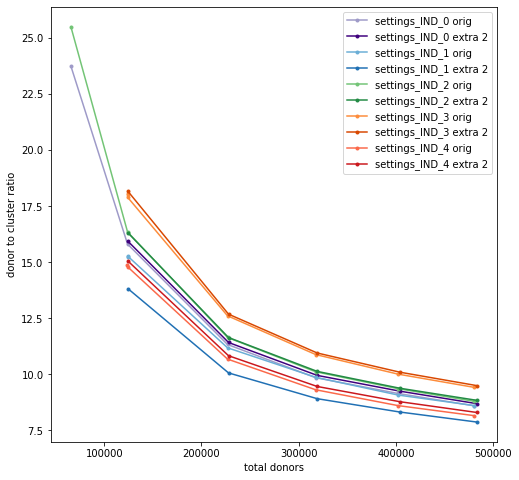

In [81]:
plt.figure(figsize=(8,8))
for s in ratio_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('donor to cluster ratio')
plt.legend()

In [82]:
avg_size_sets = []
for i, file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    avg_size_sets.append([data_cut['total_donors'].values, data_cut['avg_cluster_size'].values, file[1], color,file[2]])

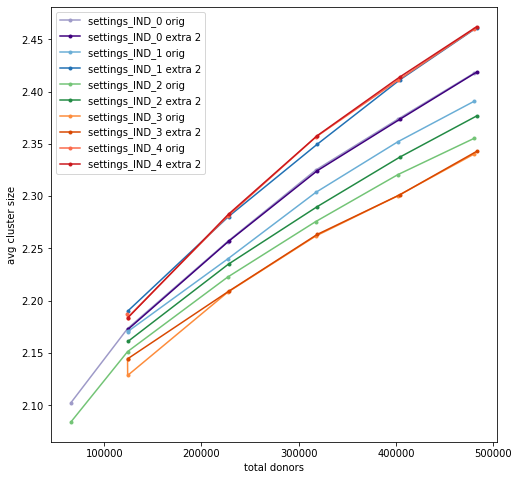

In [83]:
plt.figure(figsize=(8,8))
for s in avg_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[4])
plt.xlabel('total donors')
plt.ylabel('avg cluster size')
plt.legend()

In [84]:
biggest_size_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    biggest_size_sets.append([data_cut['total_donors'].values, data_cut['biggest_cluster_size'].values, file[1], file[2]])

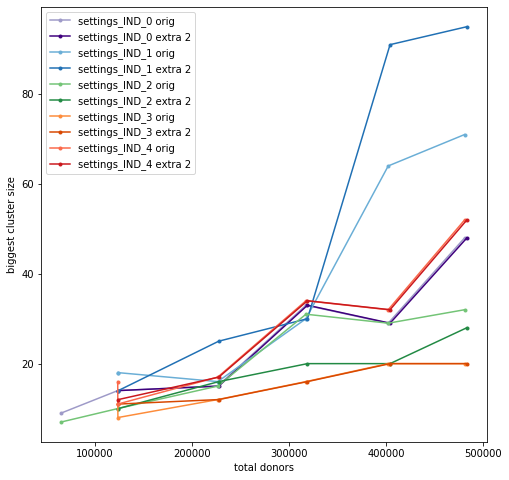

In [85]:
plt.figure(figsize=(8,8))
for s in biggest_size_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('biggest cluster size')
plt.legend()

In [88]:
total_clusters_sets = []
for i,file in enumerate(files_grouped):
    data_cut = data_df_2[data_df_2['settings_file'] == file[0]].sort_values('total_donors')
    color = colors[i]
    total_clusters_sets.append([data_cut['total_donors'].values, data_cut['total_clusters'].values, file[1], file[2]])

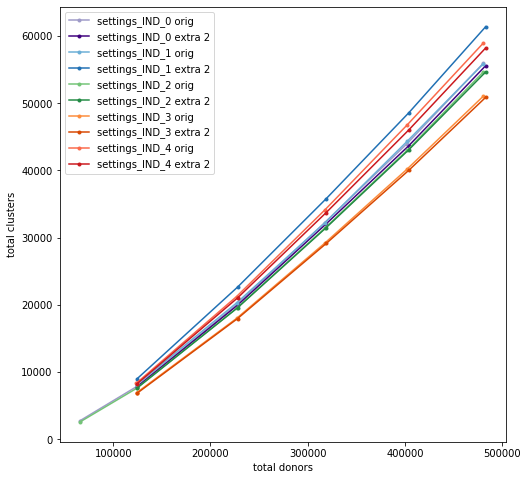

In [89]:
plt.figure(figsize=(8,8))
for s in total_clusters_sets:
    plt.plot(s[0],s[1], ms=6, marker='.', label=s[2], color=s[3])
plt.xlabel('total donors')
plt.ylabel('total clusters')
plt.legend()